REVIEWS :)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.Summary.head()


0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [5]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [6]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word


In [7]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]',' ')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x : str(TextBlob(x).correct()))

df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Text'].head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
/var/folders/53/wsj_68ks75l4gf7qydwj8pbr0000gn/T/ipykernel_50112/3797272237.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Text'] = df['Text'].str.replace('[^\w\s]',' ')


0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

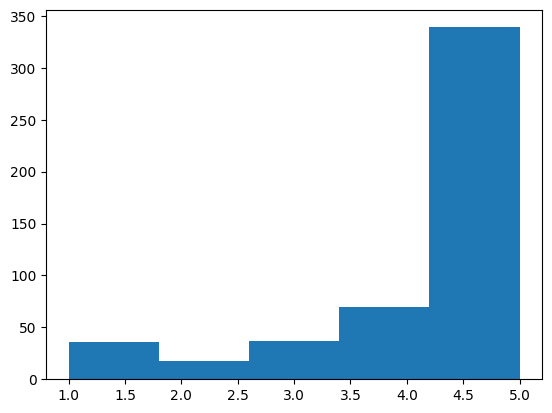

Score
1     36
2     18
3     37
4     70
5    339
Name: Id, dtype: int64


In [8]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5, grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [9]:
score_1 = reviews[reviews['Score'] == 1].sample(n = 18)
score_2 = reviews[reviews['Score'] == 2].sample(n = 18)
score_3 = reviews[reviews['Score'] == 3].sample(n = 18)
score_4 = reviews[reviews['Score'] == 4].sample(n = 18)
score_5 = reviews[reviews['Score'] == 5].sample(n = 18)

In [10]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample = reviews_sample.reset_index(drop=True)

print(reviews.sample.groupby('Score').count().Id)

AttributeError: 'function' object has no attribute 'groupby'

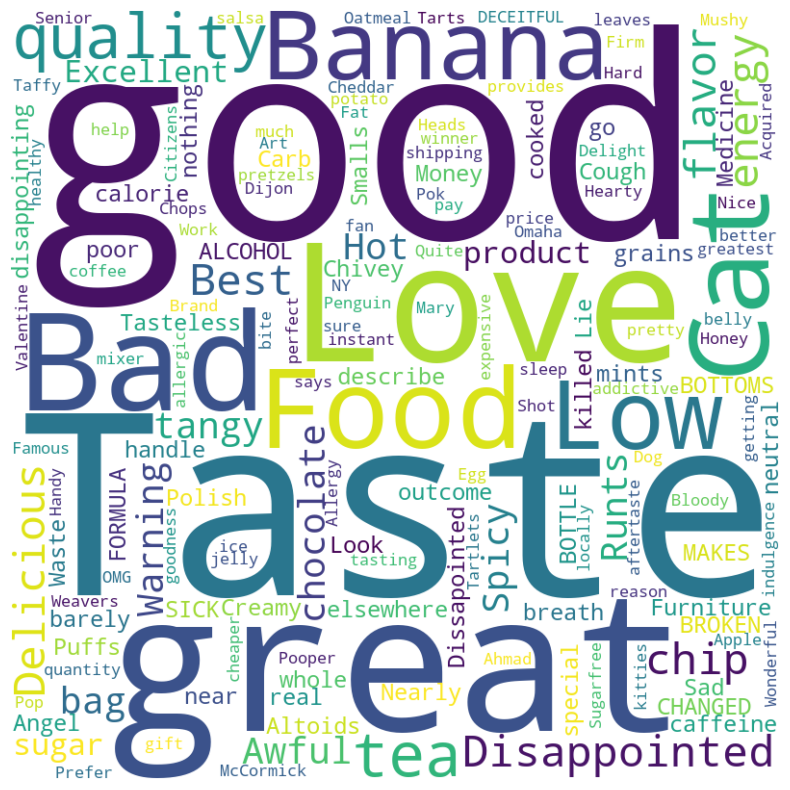

In [11]:
from wordcloud import WordCloud

reviews_str = " ".join(reviews_sample["Summary"].to_numpy())
wordcloud = WordCloud(width = 800, height = 800, background_color ='white').generate(reviews_str)
plt.figure(figsize = (10 ,10))
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [1]:
negative_reviews  = reviews_sample[reviews_sample['Score'].isin([1, 2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4, 5])]

negative_reviews_str = negative_reviews["Summary"].str.cat()
positive_reviews_str = positive_reviews["Summary"].str.cat()

NameError: name 'reviews_sample' is not defined

In [2]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Reviews', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Reviews', fontsize=20)
plt.show()

NameError: name 'WordCloud' is not defined

In [4]:
!pip install vaderSentiment

In [8]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [9]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


In [11]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138


In [12]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')
df_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.711,0.289,0.9441,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.085,0.771,0.144,0.8138,Positive
